In [116]:
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import math as m

import statsmodels.api as sm

import statsmodels.formula.api as smf

from scipy import stats

from scipy.stats import kurtosis 
from scipy.stats import skew

### Clean the data

In [50]:
Lake_Bilancino = pd.read_csv('Lake_Bilancino.csv')

In [51]:
# There aren't any valid values until Jan 01 2004
print(Lake_Bilancino[:577].isna().mean())

Date                    0.000000
Rainfall_S_Piero        1.000000
Rainfall_Mangona        1.000000
Rainfall_S_Agata        1.000000
Rainfall_Cavallina      1.000000
Rainfall_Le_Croci       1.000000
Temperature_Le_Croci    1.000000
Lake_Level              0.000000
Flow_Rate               0.036395
dtype: float64


In [52]:
# Cut the data from then Jan 01 2004
Lake_Bilancino_Cut = Lake_Bilancino[577:].reset_index(drop = True)

# Imputation 
Lake_Bilancino_Cut.loc[Lake_Bilancino_Cut.Date == '01/01/2004', 'Temperature_Le_Croci'] = Lake_Bilancino_Cut.Temperature_Le_Croci.mean()

In [53]:
# Create month column 
Lake_Bilancino_Cut['Month'] = Lake_Bilancino_Cut.Date.apply(lambda x: x[3:5])

# Create year column 
Lake_Bilancino_Cut['Year'] = Lake_Bilancino_Cut.Date.apply(lambda x: x[6:10])

In [55]:
# Spring- March April May 
# Summer-June July august 
# Autumn- September, October, November 
# Winter- December January February

# Apply Season Funtion
def make_season(season):
    if season in ['03','04','05']:
        return 'Spring'
    elif season in ['06','07','08']:
        return 'Summer'
    elif season in ['09','10','11']:
        return 'Autumn'
    else:
        return 'Winter'

In [185]:
Lake_Bilancino_Cut['Season'] = Lake_Bilancino_Cut.Month.apply(make_season)

### Questions and Methods
1. Analyze flow rate and water level between seasons
    - Kurtosis Simulation Test
    - Kruskal - Wallis Test

#### Lake Level 

In [91]:
Lake_Bilancino_Cut.Season.value_counts()

Spring    1564
Winter    1504
Summer    1502
Autumn    1456
Name: Season, dtype: int64


Kurtosis for normal distribution (should be 0): -0.5033583017134986
Skewness of normal distribution (should be 0): -0.7522411671581641


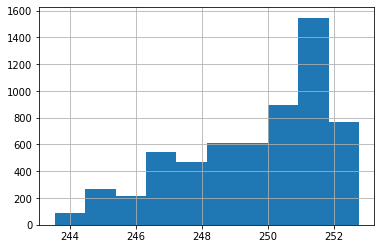

In [203]:
Lake_Bilancino_Cut.Lake_Level.hist()
#Lake_Bilancino_Cut.Lake_Level.describe()
#sns.histplot(data=Lake_Bilancino_Cut, x="Lake_Level")

print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Lake_Bilancino_Cut.Lake_Level)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Lake_Bilancino_Cut.Lake_Level)))


Kurtosis for normal distribution (should be 0): 7.908177509668862
Skewness of normal distribution (should be 0): -2.746259672934576


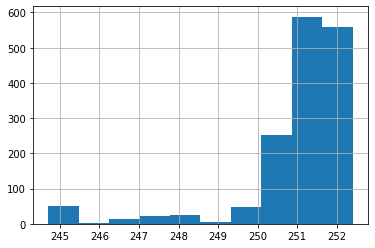

In [201]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Spring'].Lake_Level.hist()
Spring_Lake_Level = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Spring'].Lake_Level
print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Spring_Lake_Level)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Spring_Lake_Level)))


Kurtosis for normal distribution (should be 0): -0.49416624536716514
Skewness of normal distribution (should be 0): -0.7522149298567467


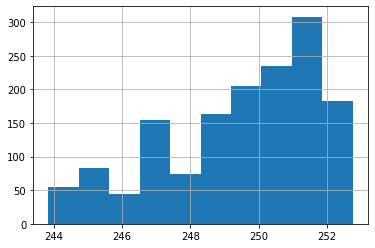

In [121]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Winter'].Lake_Level.hist()
Winter_Lake_Level = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Winter'].Lake_Level
print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Winter'].Lake_Level)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Winter_Lake_Level)))


Kurtosis for normal distribution (should be 0): 1.3479750284887322
Skewness of normal distribution (should be 0): -1.162173606084193


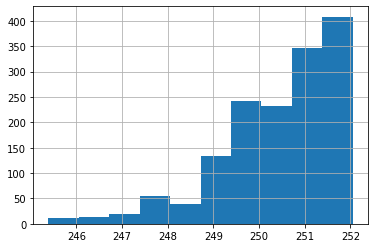

In [123]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Summer'].Lake_Level.hist()
Summer_Lake_Level = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Summer'].Lake_Level
print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Summer_Lake_Level)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Summer_Lake_Level)))


Kurtosis for normal distribution (should be 0): -0.1288667126969134
Skewness of normal distribution (should be 0): -0.23664741215027785


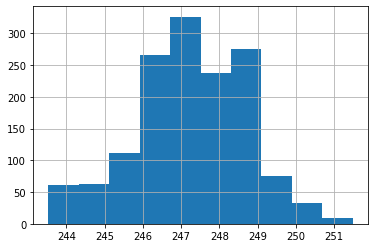

In [124]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Autumn'].Lake_Level.hist()
Autumn_Lake_Level = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Autumn'].Lake_Level
print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Autumn'].Lake_Level)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Autumn_Lake_Level)))

#### Flow Rate


Kurtosis for normal distribution : 60.39221118451545


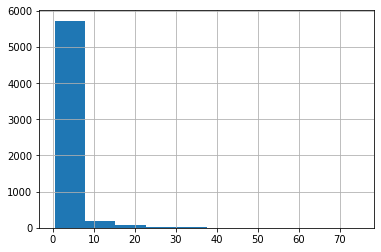

In [63]:
Lake_Bilancino_Cut.Flow_Rate.hist()
Lake_Bilancino_Cut.Flow_Rate.describe()

# An extreme positive kurtosis indicates a distribution where more of the values are located
# in the tails of the distribution rather than around the mean.
print( '\nKurtosis for normal distribution :', kurtosis(Lake_Bilancino_Cut.Flow_Rate)) 

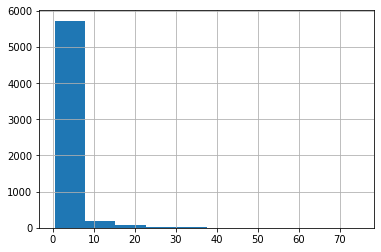

In [125]:
# Logistically Transform the Flow Rate
Lake_Bilancino_Cut.Flow_Rate.hist()

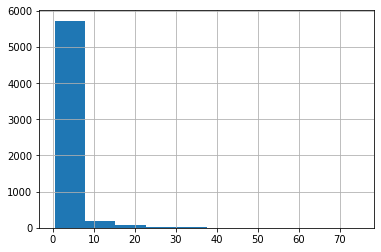

In [126]:
# Square Root Transform the Flow Rate
Lake_Bilancino_Cut.Flow_Rate.hist()


Kurtosis for normal distribution (should be 0): 27.558922256853283
Skewness of normal distribution (should be 0): 3.9065287852494053


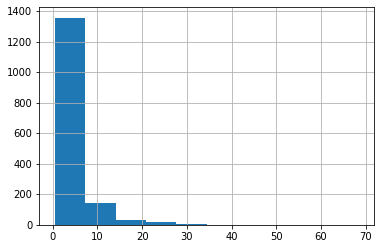

In [127]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Spring'].Flow_Rate.hist()
Spring_Flow_Rate = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Spring'].Flow_Rate

print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Spring_Flow_Rate)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Spring_Flow_Rate)))


Kurtosis for normal distribution (should be 0): 36.52927105368438
Skewness of normal distribution (should be 0): 4.767458306303771


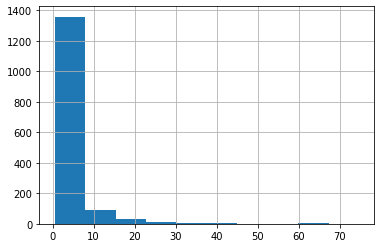

In [128]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Winter'].Flow_Rate.hist()
Winter_Flow_Rate = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Winter'].Flow_Rate

print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Winter_Flow_Rate)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Winter_Flow_Rate)))


Kurtosis for normal distribution (should be 0): 0.4743729364028657
Skewness of normal distribution (should be 0): 0.6754771720981214


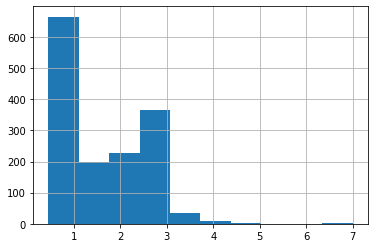

In [131]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Summer'].Flow_Rate.hist()
Summer_Flow_Rate = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Summer'].Flow_Rate

print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Summer_Flow_Rate)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Summer_Flow_Rate)))


Kurtosis for normal distribution (should be 0): 63.928586332556335
Skewness of normal distribution (should be 0): 6.053635014272246


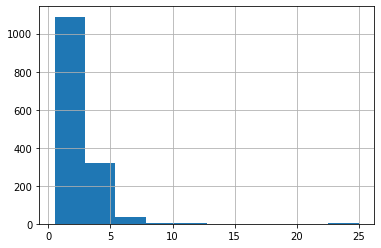

In [132]:
Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Autumn'].Flow_Rate.hist()
Autumn_Flow_Rate = Lake_Bilancino_Cut[Lake_Bilancino_Cut.Season == 'Autumn'].Flow_Rate

print( '\nKurtosis for normal distribution (should be 0):', kurtosis(Autumn_Flow_Rate)) 
print( 'Skewness of normal distribution (should be 0): {}'.format(skew(Autumn_Flow_Rate)))

### Kruskal Wallis Test for Lake Level

In [167]:
stats.kruskal(Spring_Lake_Level, Autumn_Lake_Level)
stats.kruskal(Spring_Lake_Level, Winter_Lake_Level)
stats.kruskal(Spring_Lake_Level, Summer_Lake_Level)

stats.kruskal(Autumn_Lake_Level, Winter_Lake_Level)
stats.kruskal(Autumn_Lake_Level, Summer_Lake_Level)
stats.kruskal(Winter_Lake_Level, Summer_Lake_Level)

KruskalResult(statistic=81.75675879509366, pvalue=1.539093487057443e-19)

### Kruskal Wallis Test for Flow Rate

In [180]:
stats.kruskal(Spring_Flow_Rate, Autumn_Flow_Rate)
stats.kruskal(Spring_Flow_Rate, Winter_Flow_Rate)
stats.kruskal(Spring_Flow_Rate, Summer_Flow_Rate)

stats.kruskal(Autumn_Flow_Rate, Winter_Flow_Rate)
stats.kruskal(Autumn_Flow_Rate, Summer_Flow_Rate)
stats.kruskal(Winter_Flow_Rate, Summer_Flow_Rate)

KruskalResult(statistic=42.291331169973994, pvalue=7.864036504484014e-11)